
# Wi-Fi Random Topology Simulation Analysis

This Jupyter Notebook analyzes NS-3 simulation results for a **Wi-Fi Random Topology** scenario.
It visualizes throughput, RSSI, and loss patterns, and summarizes performance degradation due to interference.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Base directory where all CSVs are saved
base_dir = Path("../outputs/csv")


In [3]:
perf_files = sorted(base_dir.glob("wifi-random-*-perf.csv"))
rssi_files = sorted(base_dir.glob("wifi-random-*-rssi.csv"))
if not perf_files:
    raise FileNotFoundError("No perf.csv files found")
if not rssi_files:
    raise FileNotFoundError("No rssi.csv files found")

In [4]:
# Combine perf files
perf_dfs = []
for f in perf_files:
    ts = f.stem.replace("wifi-random-", "").replace("-perf", "")
    df = pd.read_csv(f)
    df["Run_Timestamp"] = ts
    perf_dfs.append(df)
perf_df_all = pd.concat(perf_dfs, ignore_index=True)

print(f"✅ Loaded {len(perf_files)} perf files")

✅ Loaded 4 perf files


In [5]:
# Combine rssi files
rssi_dfs = []
for f in rssi_files:
    ts = f.stem.replace("wifi-random-", "").replace("-rssi", "")
    df = pd.read_csv(f)
    df["Run_Timestamp"] = ts
    rssi_dfs.append(df)
rssi_df_all = pd.concat(rssi_dfs, ignore_index=True)
print(f"✅ Loaded {len(rssi_files)} rssi files")

✅ Loaded 4 rssi files


In [6]:
# You can merge on Run_Timestamp to analyze both together
merged_df = pd.merge(perf_df_all, rssi_df_all, on="Run_Timestamp", how="inner")

# Save a merged dataset if needed
merged_df.to_csv("../outputs/combine_analysis/wifi-random-merged-all.csv", index=False)

print(f"Combined dataset shape: {merged_df.shape}")
display(merged_df.head())


Combined dataset shape: (65520, 12)


,FlowID,Source,Destination,Throughput(Mbps),Latency_avg(ms),Jitter_avg(ms),PacketLoss(%),Run_Timestamp,time_s,channel_MHz,signal_dBm,noise_dBm
0,1,10.1.4.1,10.1.4.3,0.0,0.0,0.0,100.0,18-Oct-2025_09-46,0.088729,5210,-78.045835,-93.965985
1,1,10.1.4.1,10.1.4.3,0.0,0.0,0.0,100.0,18-Oct-2025_09-46,0.088729,5210,-77.582769,-93.965985
2,1,10.1.4.1,10.1.4.3,0.0,0.0,0.0,100.0,18-Oct-2025_09-46,0.088729,5210,-80.539553,-93.965985
3,1,10.1.4.1,10.1.4.3,0.0,0.0,0.0,100.0,18-Oct-2025_09-46,0.088729,5210,-79.090166,-93.965985
4,1,10.1.4.1,10.1.4.3,0.0,0.0,0.0,100.0,18-Oct-2025_09-46,0.088729,5210,-74.319608,-93.965985


In [7]:
perf_df = perf_df_all.copy()
rssi_df = rssi_df_all.copy()



In [8]:
# Clean column names
perf_df.columns = [c.strip() for c in perf_df_all.columns]
rssi_df.columns = [c.strip() for c in rssi_df_all.columns]


In [9]:

perf_df.head()


,FlowID,Source,Destination,Throughput(Mbps),Latency_avg(ms),Jitter_avg(ms),PacketLoss(%),Run_Timestamp
0,1,10.1.4.1,10.1.4.3,0.000000,0.00000,0.00000,100.0000,18-Oct-2025_09-46
1,2,10.1.4.2,10.1.4.3,0.000000,0.00000,0.00000,100.0000,18-Oct-2025_09-46
2,3,10.1.3.1,10.1.3.8,0.845912,19.74720,6.60006,99.8929,18-Oct-2025_09-46
3,4,10.1.3.2,10.1.3.8,0.018282,2.57143,2.59898,98.9643,18-Oct-2025_09-46
4,5,10.1.3.3,10.1.3.8,0.000000,0.00000,0.00000,100.0000,18-Oct-2025_09-46


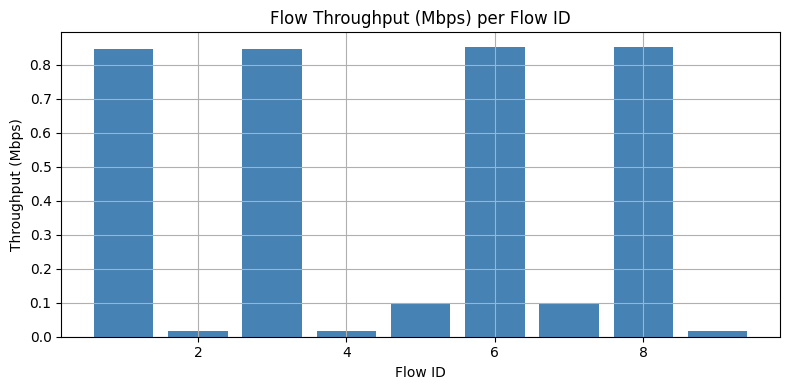

In [14]:
# === Figure 1: Flow Throughput per Flow ID ===
plt.figure(figsize=(8,4))
plt.bar(perf_df["FlowID"], perf_df["Throughput(Mbps)"], color="steelblue")
plt.title("Flow Throughput (Mbps) per Flow ID")
plt.xlabel("Flow ID")
plt.ylabel("Throughput (Mbps)")
plt.title("Flow Throughput (Mbps) per Flow ID")
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/wifi-random-throughput-per-flowid.png", dpi=300)
plt.show()



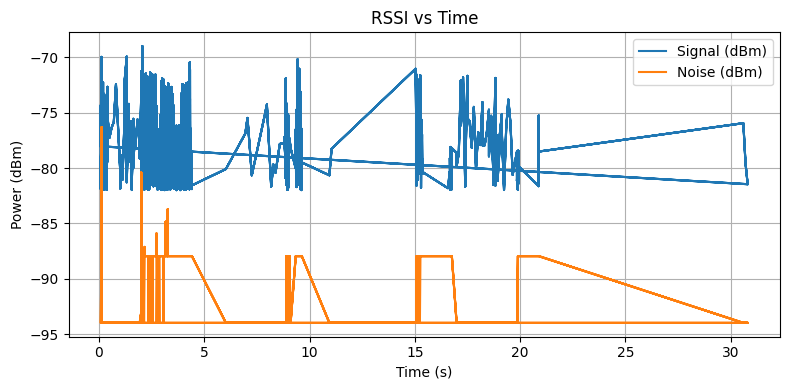

In [ ]:
# === Figure 2: RSSI vs Time ===
plt.figure(figsize=(8,4))
plt.plot(rssi_df["time_s"], rssi_df["signal_dBm"], label="Signal (dBm)")
plt.plot(rssi_df["time_s"], rssi_df["noise_dBm"], label="Noise (dBm)")
plt.title("RSSI vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Power (dBm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/wifi-random-rssi-vs-time.png", dpi=300)
plt.show()



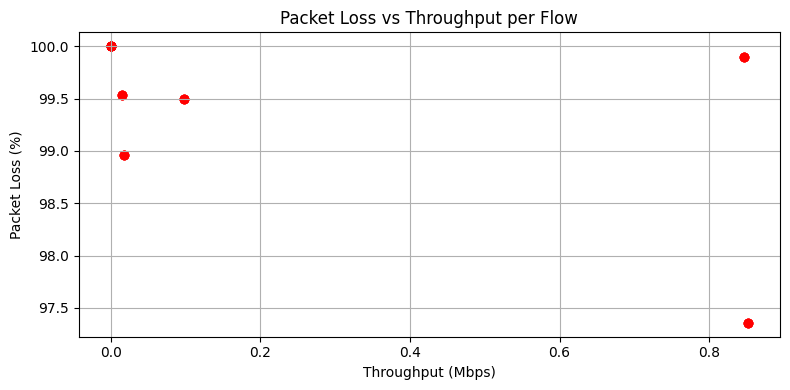

In [15]:

# === Figure 3: Packet Loss vs Throughput ===
plt.figure(figsize=(8,4))
plt.scatter(perf_df["Throughput(Mbps)"], perf_df["PacketLoss(%)"], color="red")
plt.title("Packet Loss vs Throughput per Flow")
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Packet Loss (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/wifi-random-packetloss-vs-throughput.png", dpi=300)
plt.show()



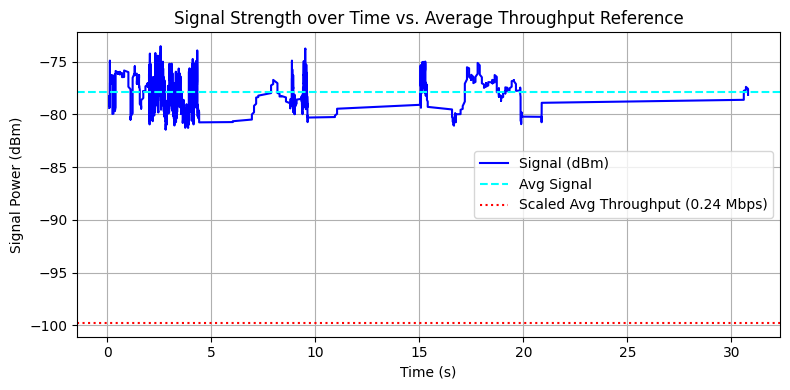

In [17]:

# === Figure 4: Signal Strength over Time vs Average Throughput ===
rssi_df_sorted = rssi_df.sort_values("time_s")
rssi_df_sorted["signal_avg"] = rssi_df_sorted["signal_dBm"].rolling(window=20, min_periods=1).mean()
avg_throughput = perf_df["Throughput(Mbps)"].mean()

plt.figure(figsize=(8,4))
plt.plot(rssi_df_sorted["time_s"], rssi_df_sorted["signal_avg"], label="Signal (dBm)", color="blue")
plt.axhline(y=rssi_df_sorted["signal_avg"].mean(), color="cyan", linestyle="--", label="Avg Signal")
plt.axhline(y=avg_throughput - 100, color="red", linestyle=":", label=f"Scaled Avg Throughput ({avg_throughput:.2f} Mbps)")
plt.title("Signal Strength over Time vs. Average Throughput Reference")
plt.xlabel("Time (s)")
plt.ylabel("Signal Power (dBm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/wifi-random-signal-vs-avg-throughput.png", dpi=300)
plt.show()



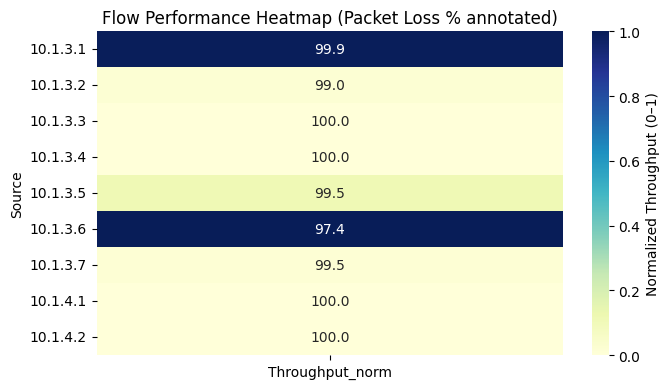

In [16]:

# === Figure 5: Flow Performance Heatmap ===
heatmap_data = perf_df.pivot_table(index="Source", values=["Throughput(Mbps)", "PacketLoss(%)"], aggfunc="mean")
heatmap_data["Throughput_norm"] = heatmap_data["Throughput(Mbps)"] / max(heatmap_data["Throughput(Mbps)"].max(), 1e-6)

plt.figure(figsize=(7,4))
sns.heatmap(
    heatmap_data[["Throughput_norm"]],
    annot=heatmap_data[["PacketLoss(%)"]],
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={"label": "Normalized Throughput (0–1)"}
)
plt.title("Flow Performance Heatmap (Packet Loss % annotated)")
plt.tight_layout()
plt.savefig("../figures/wifi-random-flow-performance-heatmap.png", dpi=300)
plt.show()



In [21]:
# === Performance Summary Table ===
def interpret_flow(row):
    if row["Throughput(Mbps)"] < 0.1:
        return "Inactive or heavily interfered link"
    elif row["PacketLoss(%)"] > 95:
        return "Severe congestion/interference"
    elif row["PacketLoss(%)"] > 80:
        return "High packet loss, unstable link"
    elif row["Throughput(Mbps)"] > 0.5 and row["PacketLoss(%)"] < 80:
        return "Moderate performance under contention"
    else:
        return "Acceptable but limited link"

summary_df = perf_df.copy()
summary_df["Interpretation"] = summary_df.apply(interpret_flow, axis=1)
summary_df.to_csv("../outputs/combine_analysis/wifi-random-summary.csv", index=False)
summary_df.head(10)


,FlowID,Source,Destination,Throughput(Mbps),Latency_avg(ms),Jitter_avg(ms),PacketLoss(%),Run_Timestamp,Interpretation
0,1,10.1.4.1,10.1.4.3,0.000000,0.00000,0.00000,100.0000,18-Oct-2025_09-46,Inactive or heavily interfered link
1,2,10.1.4.2,10.1.4.3,0.000000,0.00000,0.00000,100.0000,18-Oct-2025_09-46,Inactive or heavily interfered link
2,3,10.1.3.1,10.1.3.8,0.845912,19.74720,6.60006,99.8929,18-Oct-2025_09-46,Severe congestion/interference
3,4,10.1.3.2,10.1.3.8,0.018282,2.57143,2.59898,98.9643,18-Oct-2025_09-46,Inactive or heavily interfered link
4,5,10.1.3.3,10.1.3.8,0.000000,0.00000,0.00000,100.0000,18-Oct-2025_09-46,Inactive or heavily interfered link
5,6,10.1.3.4,10.1.3.8,0.000000,0.00000,0.00000,100.0000,18-Oct-2025_09-46,Inactive or heavily interfered link
6,7,10.1.3.5,10.1.3.8,0.098178,3.58564,4.10745,99.5000,18-Oct-2025_09-46,Inactive or heavily interfered link
7,8,10.1.3.6,10.1.3.8,0.852064,1.37983,1.67202,97.3571,18-Oct-2025_09-46,Severe congestion/interference
8,9,10.1.3.7,10.1.3.8,0.015629,2.61114,2.96595,99.5357,18-Oct-2025_09-46,Inactive or heavily interfered link
9,1,10.1.3.1,10.1.3.8,0.845912,19.74720,6.60006,99.8929,18-Oct-2025_10-54,Severe congestion/interference
